In [15]:
%load_ext autoreload
%autoreload 2
import os
import seaborn as sns
import pandas as pd
import numpy as np
import yfinance as yf
import time
import matplotlib.pyplot as plt
import pandas_ta as ta
from preprocessing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# EDA

In [16]:
stock_symbols = [
    "RIVN",  # Rivian Automotive
    "TSLA",  # Tesla
    "NIO",   # Nio Inc ADR
    "XPEV",  # Xpeng Inc ADR
    "EVGO",  # Evgo Inc
    "LI",    # Li Auto Inc ADR
    "INDI",  # Indie Semiconductor Inc Class A
    "CHPT",  # Chargepoint Holdings Inc Class A
    "LCID",  # Lucid Group Inc
    "LAZR"   # Luminar Technologies Inc Class A
]
start, end = '2022-01-01', '2024-08-31'
stocks_raw = yf.download(stock_symbols, start=start, end=end)
stocks_raw.head()

[*********************100%***********************]  10 of 10 completed


Price                      Adj Close                                       \
Ticker                          CHPT   EVGO   INDI        LAZR       LCID   
Date                                                                        
2022-01-03 00:00:00+00:00  19.870001  10.62  11.69  269.700012  40.930000   
2022-01-04 00:00:00+00:00  19.520000  10.15  11.34  267.600006  39.410000   
2022-01-05 00:00:00+00:00  18.160000   9.56  10.48  244.800003  36.680000   
2022-01-06 00:00:00+00:00  17.350000   9.58  10.60  230.100006  38.220001   
2022-01-07 00:00:00+00:00  16.889999   9.52  10.53  236.399994  41.980000   

Price                                                                    \
Ticker                            LI        NIO        RIVN        TSLA   
Date                                                                      
2022-01-03 00:00:00+00:00  32.340000  33.470001  102.720001  399.926666   
2022-01-04 00:00:00+00:00  30.330000  31.580000  101.389999  383.196655   
2022-01-05 00:00:00+00:00  29.170000  29.879999   90.010002  362.706665   
2022-01-06 00:00:00+00:00  28.379999  29.309999   87.330002  354.899994   
2022-01-07 00:00:00+00:00  29.180000  29.299999   86.279999  342.320007   

Price                                 ...    Volume                            \
Ticker                          XPEV  ...      CHPT     EVGO     INDI    LAZR   
Date                                  ...                                       
2022-01-03 00:00:00+00:00  50.270000  ...   7944400  4525800   786400  358693   
2022-01-04 00:00:00+00:00  47.599998  ...   7808100  4425800   881500  273527   
2022-01-05 00:00:00+00:00  46.110001  ...   7696000  3808800  1287300  412333   
2022-01-06 00:00:00+00:00  46.660000  ...  10271400  4630600   969000  457360   
2022-01-07 00:00:00+00:00  45.049999  ...   8711900  3360700   744100  300560   

Price                                                                         \
Ticker                         LCID        LI       NIO      RIVN       TSLA   
Date                                                                           
2022-01-03 00:00:00+00:00  45685100   7153900  64286500   8346800  103931400   
2022-01-04 00:00:00+00:00  30476900   8156400  47866800  12152200  100248300   
2022-01-05 00:00:00+00:00  43318800   6349500  42442700  18645100   80119800   
2022-01-06 00:00:00+00:00  58375500  10132000  48723200  39827100   90336600   
2022-01-07 00:00:00+00:00  78419600   8864000  40781500  17515900   84164700   

Price                                
Ticker                         XPEV  
Date                                 
2022-01-03 00:00:00+00:00  10873300  
2022-01-04 00:00:00+00:00  10009600  
2022-01-05 00:00:00+00:00  10182500  
2022-01-06 00:00:00+00:00   6973000  
2022-01-07 00:00:00+00:00  10044700  

[5 rows x 60 columns]

To start we will be analyzing the close price and volume of all but LAZR, however we will also be using High, Open, and Low for the prediction.

In [17]:
close_stocks = stocks_raw['Close'].reset_index()
close_stocks['Date'] = pd.to_datetime(close_stocks['Date'])
volume_stocks = stocks_raw['Volume'].reset_index()
volume_stocks['Date'] = pd.to_datetime(volume_stocks['Date'])
print(f"Total amount of days to analyze is {close_stocks.shape[0]}")
close_stocks.head()

Total amount of days to analyze is 669


Ticker,Date,CHPT,EVGO,INDI,LAZR,LCID,LI,NIO,RIVN,TSLA,XPEV
0,2022-01-03 00:00:00+00:00,19.870001,10.62,11.69,269.700012,40.930000,32.340000,33.470001,102.720001,399.926666,50.270000
1,2022-01-04 00:00:00+00:00,19.520000,10.15,11.34,267.600006,39.410000,30.330000,31.580000,101.389999,383.196655,47.599998
2,2022-01-05 00:00:00+00:00,18.160000,9.56,10.48,244.800003,36.680000,29.170000,29.879999,90.010002,362.706665,46.110001
3,2022-01-06 00:00:00+00:00,17.350000,9.58,10.60,230.100006,38.220001,28.379999,29.309999,87.330002,354.899994,46.660000
4,2022-01-07 00:00:00+00:00,16.889999,9.52,10.53,236.399994,41.980000,29.180000,29.299999,86.279999,342.320007,45.049999


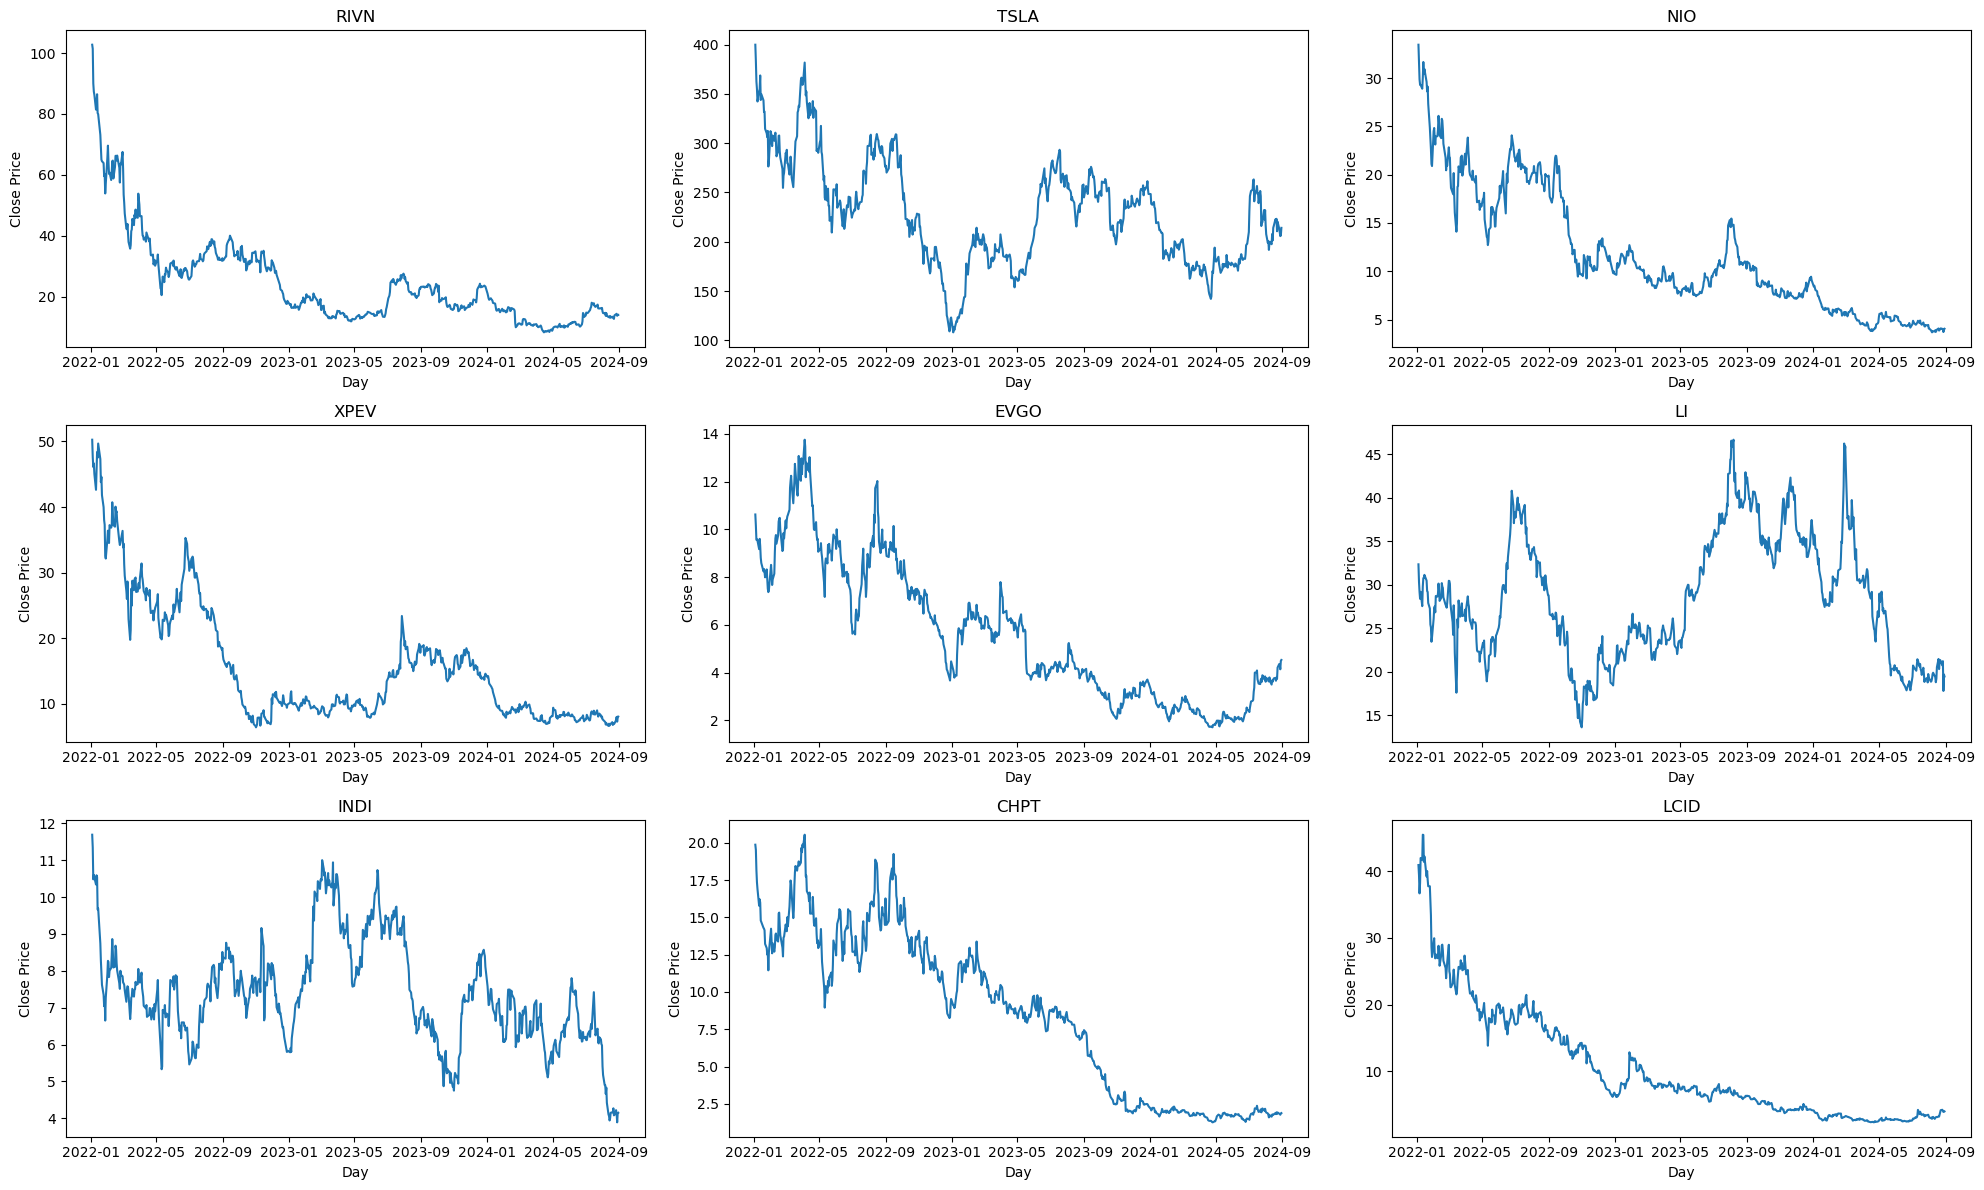

In [18]:
plt.figure(figsize=(20,12))
for i, company in enumerate(stock_symbols[:-1],1):
    plt.subplot(3, 3, i)
    df=close_stocks[company]
    plt.plot(close_stocks['Date'], close_stocks[company])
    plt.title(company)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
plt.tight_layout()
plt.show()

They all appear to follow the same downward trend over time. Lets see if that holds true when comparing with the simple moving average over 20, 50, and 100 days and exponential moving average.

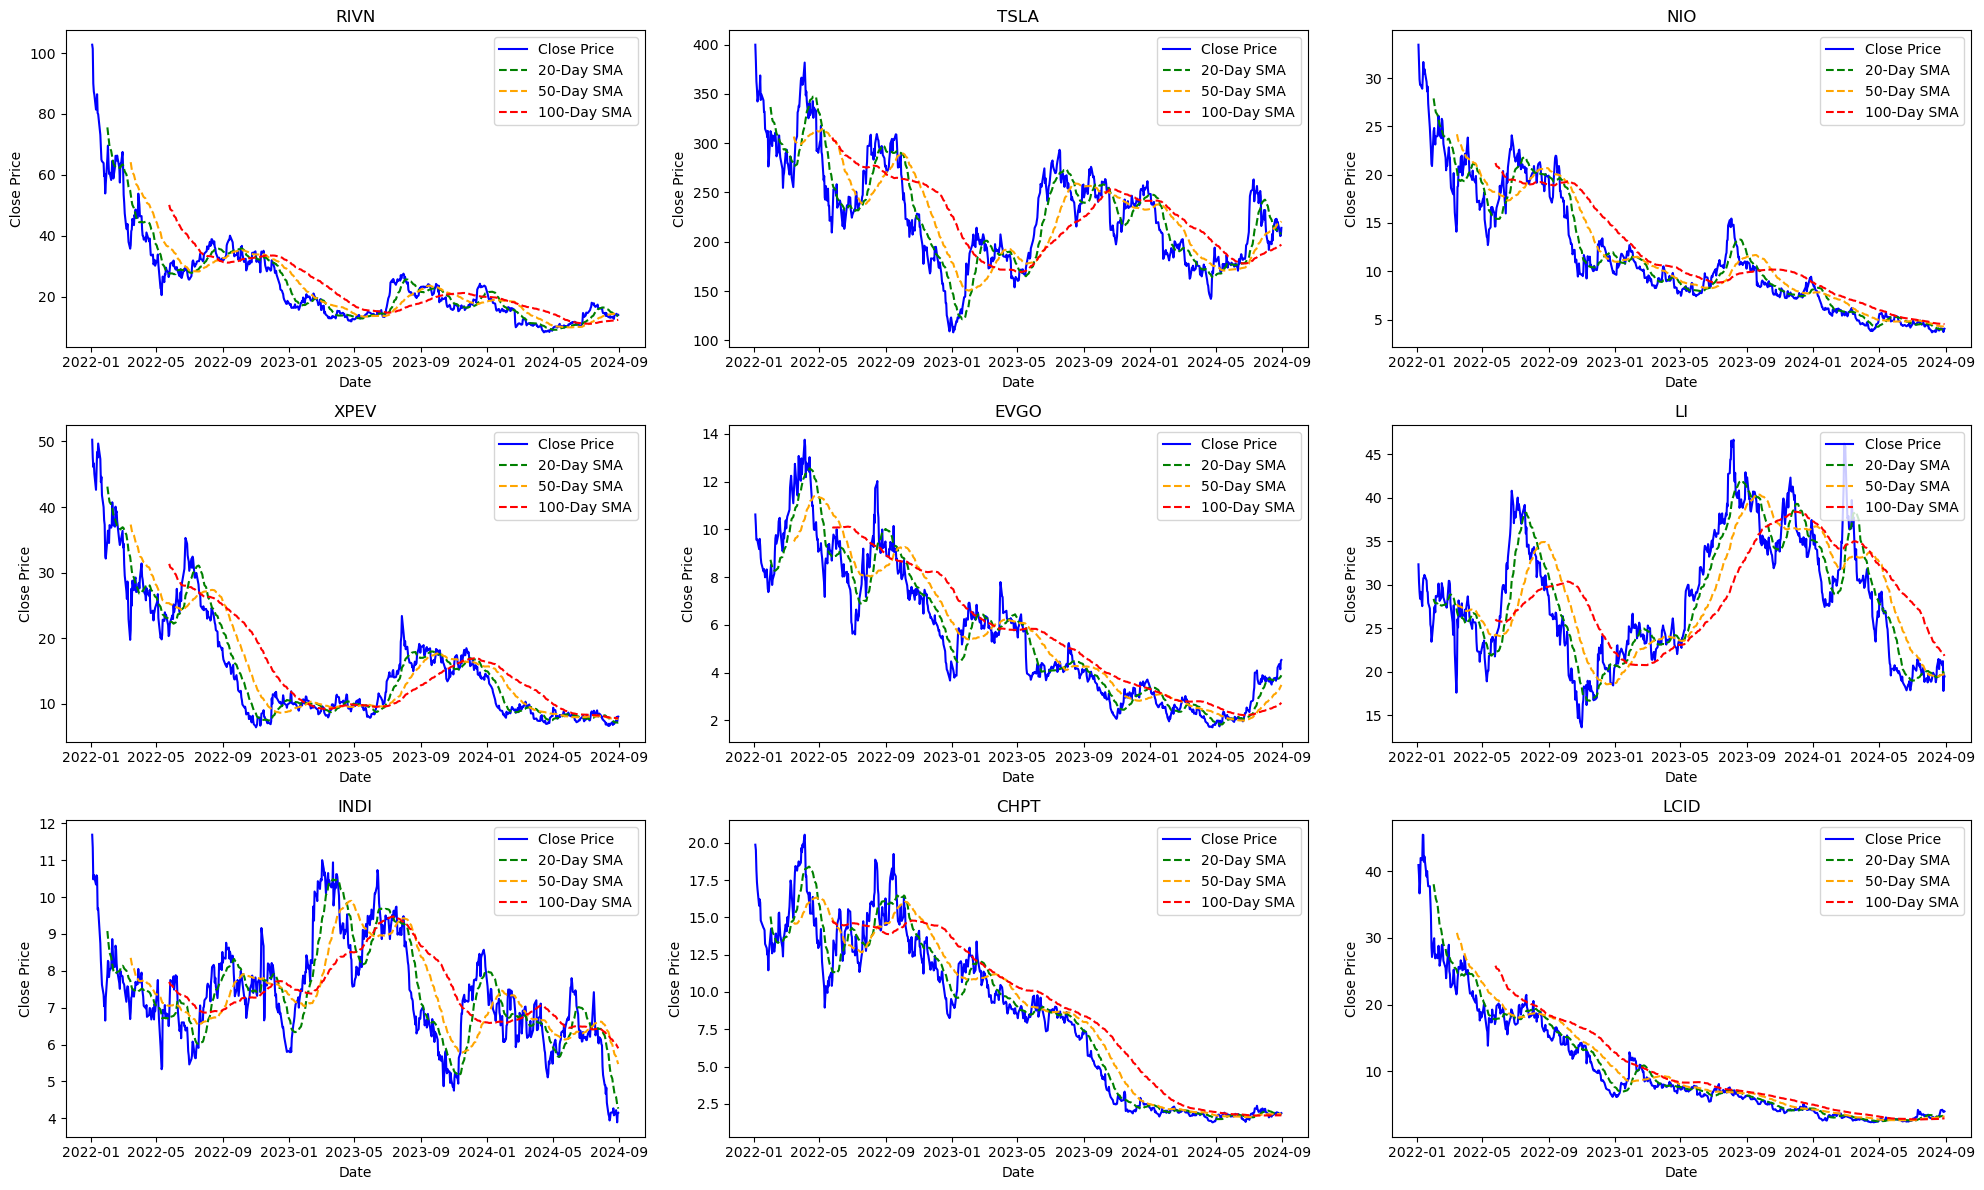

In [19]:
plt.figure(figsize=(20,12))
for i, company in enumerate(stock_symbols[:-1], 1):
    df = close_stocks[company]
    
    sma_20 = df.rolling(window=20).mean()
    sma_50 = df.rolling(window=50).mean()
    sma_100 = df.rolling(window=100).mean()
    
    plt.subplot(3, 3, i)
    plt.plot(close_stocks['Date'], df, label='Close Price', color='blue')
    plt.plot(close_stocks['Date'], sma_20, label='20-Day SMA', color='green', linestyle='--')
    plt.plot(close_stocks['Date'], sma_50, label='50-Day SMA', color='orange', linestyle='--')
    plt.plot(close_stocks['Date'], sma_100, label='100-Day SMA', color='red', linestyle='--')
    
    plt.title(company)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    
plt.tight_layout()
plt.show()


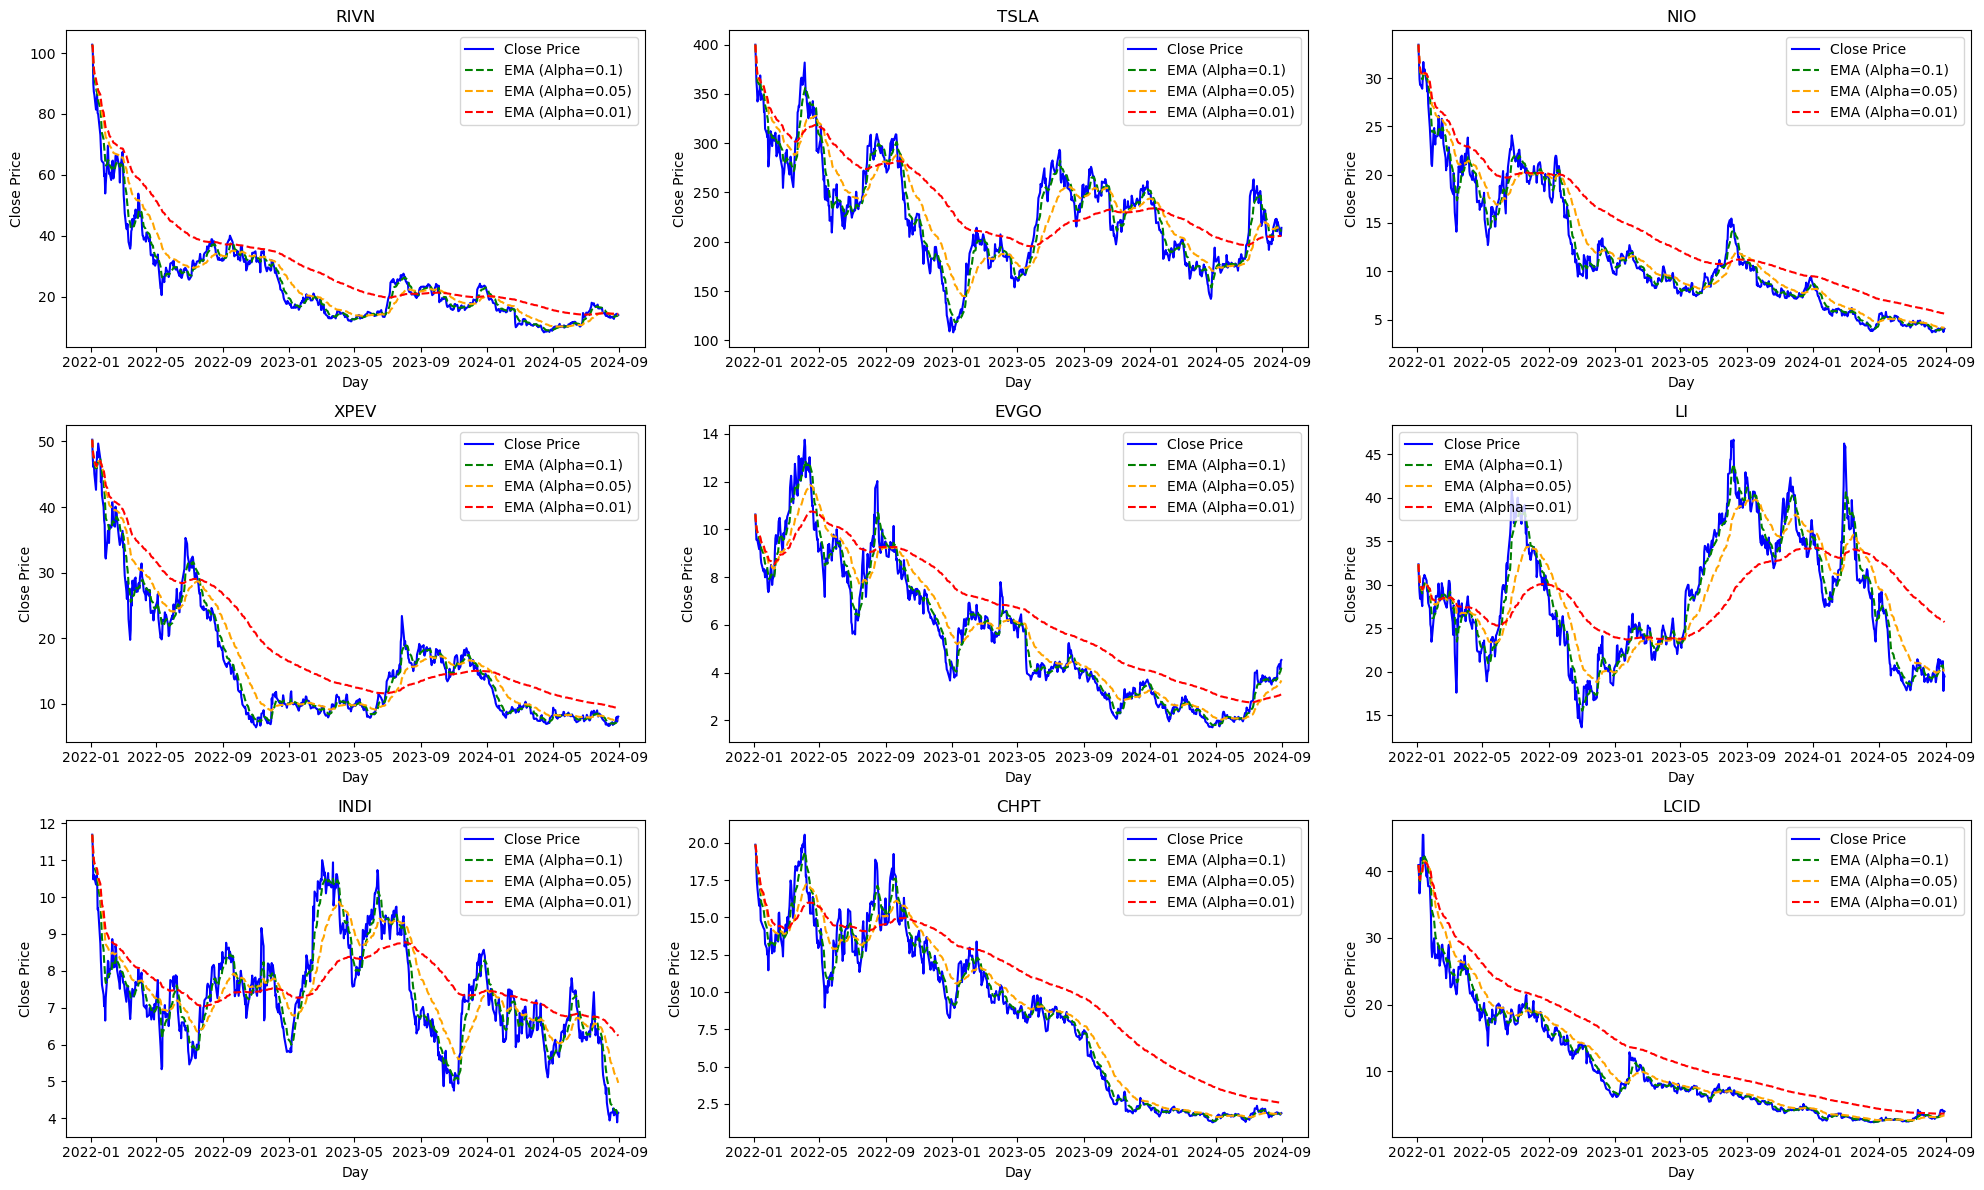

In [20]:
plt.figure(figsize=(20,12))
for i, company in enumerate(stock_symbols[:-1], 1):
    df = close_stocks[company]
    
    ema_fast = df.ewm(alpha=0.2).mean()  
    ema_medium = df.ewm(alpha=0.05).mean() 
    ema_slow = df.ewm(alpha=0.01).mean() 
    
    plt.subplot(3, 3, i)
    plt.plot(close_stocks['Date'], df, label='Close Price', color='blue')
    plt.plot(close_stocks['Date'], ema_fast, label='EMA (Alpha=0.1)', color='green', linestyle='--')
    plt.plot(close_stocks['Date'], ema_medium, label='EMA (Alpha=0.05)', color='orange', linestyle='--')
    plt.plot(close_stocks['Date'], ema_slow, label='EMA (Alpha=0.01)', color='red', linestyle='--')
    
    plt.title(company)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
    plt.legend()
plt.tight_layout()
plt.show()

In both cases it appears that they all follow the same trend and generally when one increases over time all of the others likely do as well which is confirmed by taking the moving average and smoothening the data. We can also see this in the heatmap:

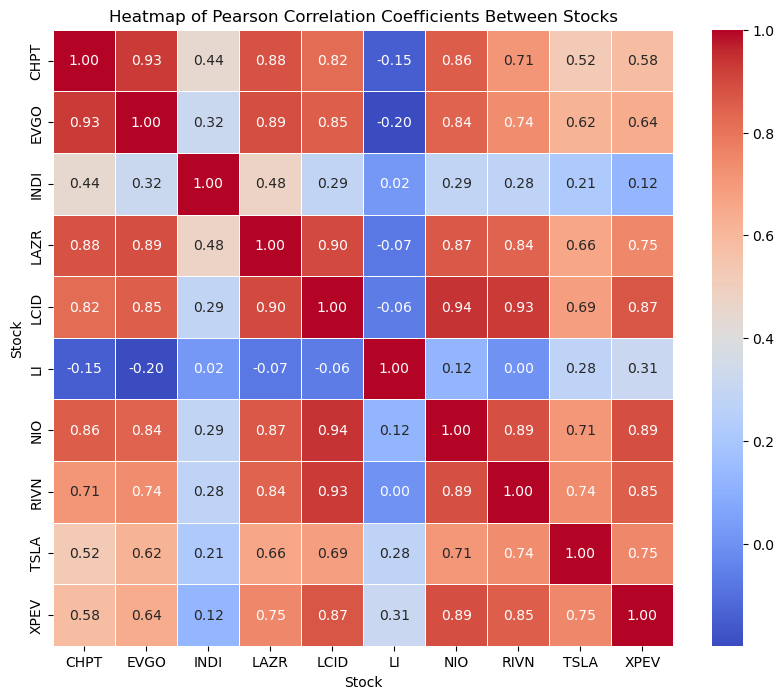

In [21]:
correlation_matrix = close_stocks.drop(columns = ['Date']).corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Pearson Correlation Coefficients Between Stocks')
plt.xlabel('Stock')
plt.ylabel('Stock')
plt.show()

This thus means that we can somewhat confidently say that they follow similar distributions and finding pertaining to one stock has a decent chance of being true for all of the other EV stocks. 

# Technical Indicators

Now we will look at some technical indicators that have been historically used in trading. In particular RSI, MACD, Bollinger Bands, Chop, and Average Directional Index, and the above mentioned EMA and SMA in relation to Tesla specifically.

In [22]:
strat = ta.Strategy(
    name = 'Best Strategy Ever',
    ta = [
        {'kind':'ema', 'length': 10, 'col_names': 'ema_10'},
        {'kind':'ema', 'length': 25, 'col_names': 'ema_25'},
        {'kind':'ema', 'length': 50, 'col_names': 'ema_50'},
        {'kind':'ema', 'length': 100, 'col_names': 'ema_100'},
        {'kind':'hma', 'length': 10, 'col_names': 'hma_10'},
        {'kind':'hma', 'length': 25, 'col_names': 'hma_25'},
        {'kind':'hma', 'length': 50, 'col_names': 'hma_50'},
        {'kind':'hma', 'length': 100, 'col_names': 'hma_100'},
        {'kind':'macd', 'col_names': ('macd', 'macd_h', 'macd_s')},
        {'kind':'rsi', 'col_names': 'rsi'},
        {'kind':'mom', 'col_names': 'momentum'},
        {'kind':'bbands', 'col_names': ('BBL', 'BBM', 'BBU', 'BBB', 'BBP')},
        {'kind': 'ao', 'col_names': 'ao'},
        {'kind':'adx', 'col_names': ('adx', 'dmp', 'dmn',)},
        {'kind':'chop', 'col_names': 'chop'},
        ]
    )
tsla_indicator = yf.download("TSLA", start=start, end=end).reset_index()
tsla_indicator.ta.strategy(strat)
tsla_indicator['Date'] = pd.to_datetime(tsla_indicator['Date'])
print(f"columns: {tsla_indicator.columns}")
tsla_indicator.head()


[*********************100%***********************]  1 of 1 completed


columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ema_10',
       'ema_25', 'ema_50', 'ema_100', 'hma_10', 'hma_25', 'hma_50', 'hma_100',
       'macd', 'macd_h', 'macd_s', 'rsi', 'momentum', 'BBL', 'BBM', 'BBU',
       'BBB', 'BBP', 'ao', 'adx', 'dmp', 'dmn', 'chop'],
      dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume,ema_10,ema_25,ema_50,...,BBL,BBM,BBU,BBB,BBP,ao,adx,dmp,dmn,chop
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700,NaN,NaN,NaN,...,327.549248,368.609998,409.670747,22.278696,0.179865,NaN,NaN,NaN,NaN,NaN


The first indicator we will look at is RSI. It is a momentum based indicator that tells if a stock is overbought or oversold and is calculated using the percent gain and loss over a certain time period.

In [23]:
yf.download("TSLA", start=start, end=end).reset_index().reset_index()

[*********************100%***********************]  1 of 1 completed


,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
1,1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2,2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
3,3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
4,4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700
...,...,...,...,...,...,...,...,...
664,664,2024-08-26,218.750000,219.089996,211.009995,213.210007,213.210007,59301200
665,665,2024-08-27,213.250000,215.660004,206.940002,209.210007,209.210007,62821400
666,666,2024-08-28,209.720001,211.839996,202.589996,205.750000,205.750000,64116400
667,667,2024-08-29,209.800003,214.889999,205.970001,206.279999,206.279999,62308800


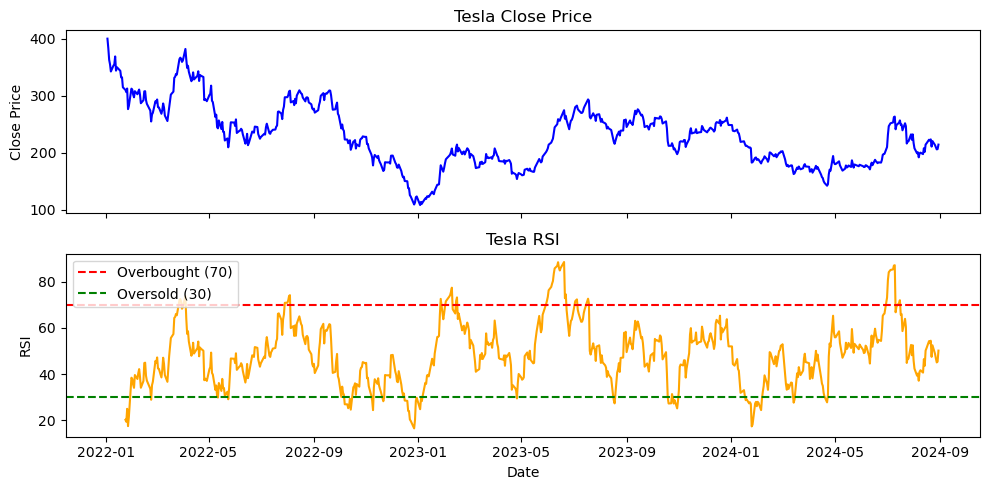

In [24]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
ax1.plot(tsla_indicator['Date'], tsla_indicator['Close'], color='blue')
ax1.set_title('Tesla Close Price')
ax1.set_ylabel('Close Price')
ax2.plot(tsla_indicator['Date'], tsla_indicator['rsi'], color='orange')
ax2.set_title('Tesla RSI')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
ax2.legend()
plt.tight_layout()
plt.show()


The next indicator that we will look at is MACD. It compares short term and long term trends to determine whether a stock is overbought or sold. The short term is called MACD and long term is called signal. If the long term trend is less than the short term trend then it indicates overbought and if long term trend is greater than short term then it is oversold.

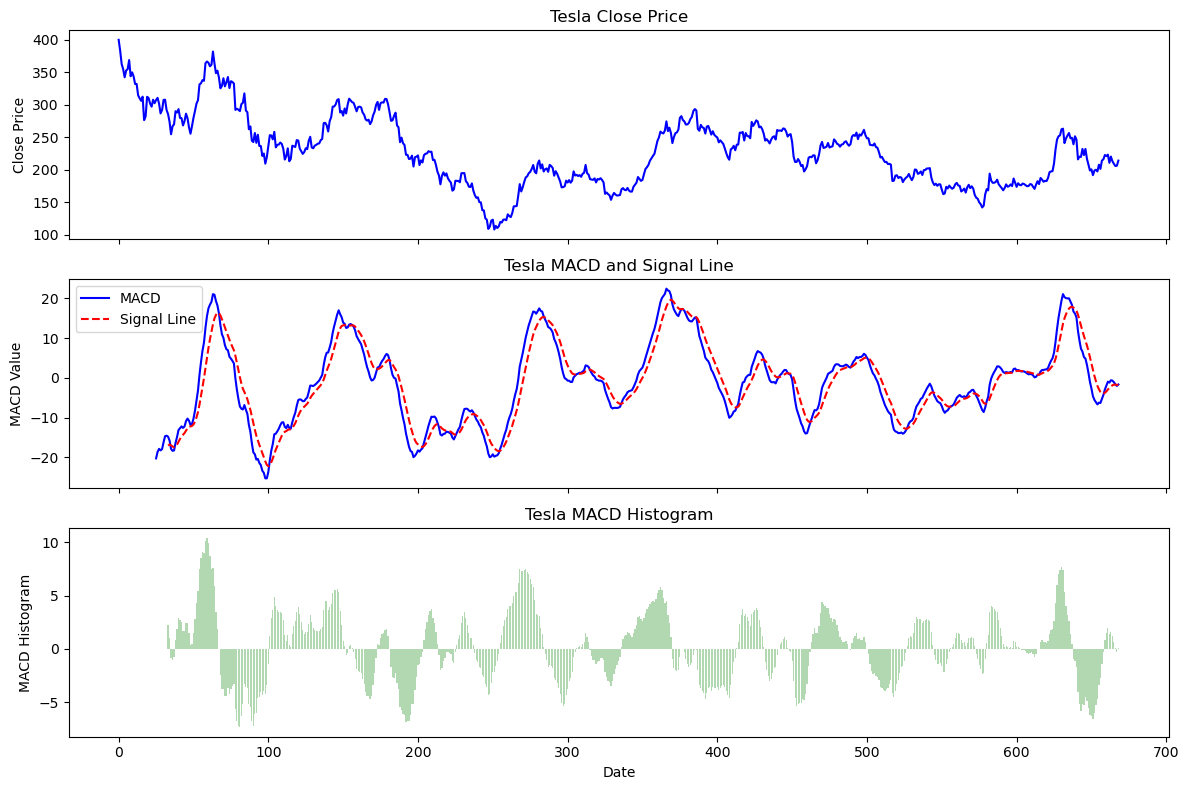

In [25]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
ax1.plot(tsla_indicator['Close'], color='blue')
ax1.set_title('Tesla Close Price')
ax1.set_ylabel('Close Price')
ax2.plot(tsla_indicator['macd'], label='MACD', color='blue')
ax2.plot(tsla_indicator['macd_s'], label='Signal Line', color='red', linestyle='--')
ax2.set_title('Tesla MACD and Signal Line')
ax2.set_ylabel('MACD Value')
ax2.legend()
ax3.bar(tsla_indicator.index, tsla_indicator['macd_h'], label='MACD Histogram', color='green', alpha=0.3)
ax3.set_title('Tesla MACD Histogram')
ax3.set_ylabel('MACD Histogram')
ax3.set_xlabel('Date')
plt.tight_layout()
plt.show()

Bollinger bands represents the standard deviation of the moving average over a time period and BBU is the upper standard deviation while BBL is the lower standard deviation. If it crosses BBU then it is likely being overbought and if crosses the lower it is likely oversold

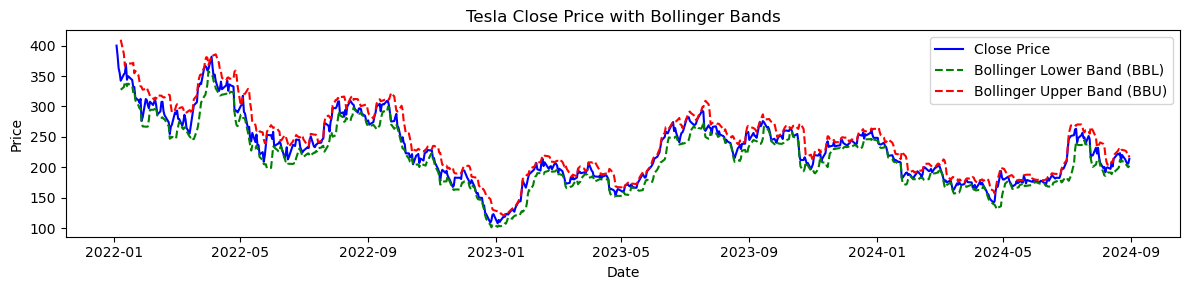

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(tsla_indicator['Date'], tsla_indicator['Close'], label='Close Price', color='blue')
plt.plot(tsla_indicator['Date'], tsla_indicator['BBL'], label='Bollinger Lower Band (BBL)', color='green', linestyle='--')
plt.plot(tsla_indicator['Date'], tsla_indicator['BBU'], label='Bollinger Upper Band (BBU)', color='red', linestyle='--')
plt.title('Tesla Close Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


Chop is simply the measure of volitility. And the last indicator we will investigate is Average Directional Index. ADX tells the strength of a trend and whether or not it is a postive or negative trend. 

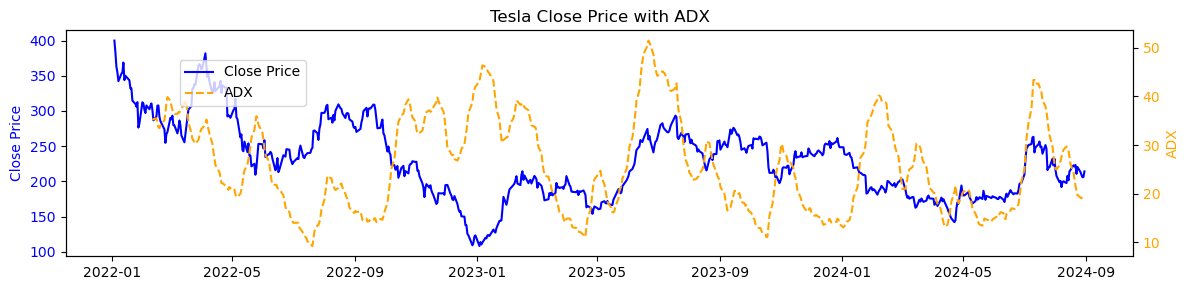

In [27]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 3))
ax1.plot(tsla_indicator['Date'], tsla_indicator['Close'], label='Close Price', color='blue')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(tsla_indicator['Date'], tsla_indicator['adx'], label='ADX', color='orange', linestyle='--')
ax2.set_ylabel('ADX', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.title('Tesla Close Price with ADX')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()


Lastly out preprocessing with all of these indicators added along with a reccomendation with what to do with each of these indicators can be found in "preprocessing.py". This can be directly used to train your own model to do predictions or you can use our model we built in "example.ipynb".

In [28]:
preprocess(['TSLA'], start, end)['TSLA']

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,ema_10,ema_25,ema_50,...,pct_change,ema_rec_short,ema_rec_long,hma_rec_short,hma_rec_long,rsi_rec,macd_rec,mom_rec,bbands_rec,ao_rec
108,2022-06-08,240.086670,249.963333,239.176666,241.866669,241.866669,76210500,241.632560,253.334687,273.270487,...,0.012475,1,4,0,-1,0,2,2,0,-2
109,2022-06-09,249.339996,255.546661,239.326660,239.706665,239.706665,96491400,241.282397,252.286377,271.954259,...,-0.008931,1,4,0,0,0,2,2,0,-2
110,2022-06-10,235.156662,239.500000,227.913330,232.229996,232.229996,97536600,239.636506,250.743579,270.396445,...,-0.031191,2,4,1,0,0,2,-1,-1,-2
111,2022-06-13,223.166672,226.633331,214.683334,215.736664,215.736664,102767400,235.291080,248.050739,268.252924,...,-0.071022,3,4,3,2,1,2,-2,-1,-2
112,2022-06-14,218.286667,226.330002,211.736664,220.889999,220.889999,97988700,232.672702,245.961451,266.395554,...,0.023887,3,4,1,1,1,2,-2,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2024-08-26,218.750000,219.089996,211.009995,213.210007,213.210007,59301200,214.883703,215.398888,212.448426,...,-0.032271,0,-1,1,0,0,2,2,0,-2
665,2024-08-27,213.250000,215.660004,206.940002,209.210007,209.210007,62821400,213.852121,214.922820,212.321429,...,-0.018761,2,0,2,1,0,2,1,-1,-2
666,2024-08-28,209.720001,211.839996,202.589996,205.750000,205.750000,64116400,212.379008,214.217218,212.063726,...,-0.016538,2,1,2,2,0,1,1,-1,-2
667,2024-08-29,209.800003,214.889999,205.970001,206.279999,206.279999,62308800,211.270098,213.606663,211.836913,...,0.002576,2,1,1,2,0,-1,-2,0,-2
